# **Using Pycaret to evaluate the TS models**

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially 


https://pycaret.readthedocs.io/en/latest/index.html

https://towardsdatascience.com/announcing-pycarets-new-time-series-module-b6e724d4636c

### **Installation and Import**

In [ ]:
# Installing Pycaret slim version
# !pip install Pycaret
!pip install pycaret-ts-alpha

In [5]:
# Import the packages
import pandas as pd
import numpy as np
from pycaret.time_series import *
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/input.xlsx')

In [7]:
df.head()

,Date,SalesVolume
0,1995-01-01,47639.0
1,1995-02-01,47880.0
2,1995-03-01,67025.0
3,1995-04-01,56925.0
4,1995-05-01,64192.0


In [8]:
df = df.dropna()
df['Date'] = pd.DatetimeIndex(df['Date'])
df = df.groupby('Date').sum()
#Settting a Monthly frequency and also to the first day of the month
df = df.asfreq('MS')

In [9]:
df.head()

,SalesVolume
Date,
1995-01-01,47639.0
1995-02-01,47880.0
1995-03-01,67025.0
1995-04-01,56925.0
1995-05-01,64192.0


In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/USD_GBP_EX_RATE.xlsx')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0)
# df = df.fillna(method='ffill')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0).fillna(df['DEXUSUK'].mean())
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# reshape_ip = np.array(df['DEXUSUK']).reshape(-1,1)
# reshape_op = imputer.fit_transform(reshape_ip)
# df['DEXUSUK'] = reshape_op
# df['observation_date'] = pd.DatetimeIndex(df['observation_date'])
# df = df.groupby('observation_date').sum()
# df = df.asfreq('D')

In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/ICERATES1100GBP30Y.xlsx')
# df['Date'] = pd.DatetimeIndex(df['Date'])
# r = pd.date_range(start=df.Date.min(), end=df.Date.max())
# df = df.set_index('Date').reindex(r).fillna(0.0).rename_axis('Date').reset_index()
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0)
# # df['SalesVolume'].fillna(method='ffill',inplace = True)
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0).fillna(df['SalesVolume'].mean())
# # from sklearn.impute import KNNImputer
# # imputer = KNNImputer(n_neighbors=4, weights="uniform")
# # reshape_ip = np.array(df['SalesVolume']).reshape(-1,1)
# # reshape_op = imputer.fit_transform(reshape_ip)
# # df['SalesVolume'] = reshape_op
# df = df.groupby('Date').sum()
# df = df.asfreq('D')
# df['SalesVolume'] = df['SalesVolume'].replace(to_replace =0,method = 'ffill')
# df['A'].replace(to_replace=0, method='ffill')
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0)

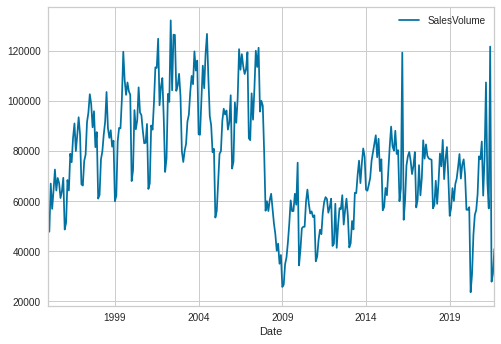

In [10]:
df.plot()

### **EDA using Pycaret**

In [11]:
# with functional API
setup(df['SalesVolume'], fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(321, 1)"
2,Missing Values,False
3,Transformed Train Set,"(314,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [12]:
# with new object-oriented API
exp = TimeSeriesExperiment()
exp.setup(df, fh = 7, fold = 3, session_id = 123)
exp.models()

,Description,Value
0,session_id,123
1,Original Data,"(321, 1)"
2,Missing Values,False
3,Transformed Train Set,"(314,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


## **Plotting**

In [13]:
# Without any argument, this will plot the original dataset
exp.plot_model()

In [14]:
# ACF and PACF for the original dataset
exp.plot_model(plot="acf")

In [15]:
# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
exp.plot_model(plot="pacf", data_kwargs={'nlags':36, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

In [16]:
exp.plot_model(plot="decomp_classical")
exp.plot_model(plot="decomp_classical", data_kwargs={'type': 'additive'})
exp.plot_model(plot="decomp_stl")

In [17]:
# Show the train-test splits on the dataset
# Internally split - len(fh) as test set, remaining used as test set
exp.plot_model(plot="train_test_split")

# Show the Cross Validation splits inside the train set
exp.plot_model(plot="cv")

In [18]:
# Plot diagnostics
exp.plot_model(plot="diagnostics")

In [19]:
exp.check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,321.0
1,Summary,Statistics,Mean,,76190.785047
2,Summary,Statistics,Median,,76183.0
3,Summary,Statistics,Standard Deviation,,22252.757856
4,Summary,Statistics,Variance,,495185232.188026
5,Summary,Statistics,Kurtosis,,-0.450463
6,Summary,Statistics,Skewness,,0.180987
7,Summary,Statistics,# Distinct Values,,319.0
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",1782.092529
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",2266.585773


In [20]:
# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,10496.1429,13471.8302,0.2433,0.1825,0.8226,0.7505,-1.2557,0.0200
arima,ARIMA,11136.2717,13693.8162,0.2495,0.1935,0.8726,0.7628,-1.2894,0.0867
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,11433.9485,13835.4807,0.2628,0.1955,0.8968,0.7712,-1.2661,0.5033
polytrend,Polynomial Trend Forecaster,12459.8363,14912.795,0.2657,0.2125,0.9746,0.83,-3.0752,0.0167
grand_means,Grand Means Forecaster,14495.3944,16578.1877,0.3473,0.2348,1.1376,0.9243,-2.4571,0.0200
croston,Croston,14249.6265,16601.3733,0.3116,0.2382,1.1167,0.9248,-2.4545,0.0133
auto_arima,Auto ARIMA,14096.367,16630.0164,0.2784,0.2562,1.1033,0.9257,-2.685,30.6967
naive,Naive Forecaster,15613.8571,17858.7374,0.3293,0.2612,1.2228,0.9944,-3.2215,1.6733
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,14964.9516,17252.8123,0.3028,0.2662,1.172,0.9606,-2.6597,0.0300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,16132.2044,18643.9761,0.3211,0.289,1.2627,1.0378,-3.4684,0.0633


In [21]:
#Best model parameters
best

NaiveForecaster(sp=12, strategy='last', window_length=None)

In [22]:
# create fbprophet model
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2019-05-31,8693.3431,9374.9609,0.1205,0.1126,0.6725,0.5182,-5.9587
1,2019-12-31,24753.6555,30146.1777,0.7031,0.4399,1.9498,1.6854,-4.4882
2,2020-07-31,13287.2313,15494.3210,0.1965,0.1989,1.0367,0.8603,-1.6199
Mean,NaT,15578.0766,18338.4865,0.3400,0.2505,1.2197,1.0213,-4.0223
SD,NaT,6753.7342,8715.0375,0.2586,0.1385,0.5373,0.4899,1.8017


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [23]:
prophet

ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')

In [24]:
plot_model(best, plot = 'forecast')

In [25]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [ ]:
# in-sample plot
plot_model(best, plot = 'insample')

In [27]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 24)

2021-10     77907.0
2021-11     76747.0
2021-12     83818.0
2022-01     62240.0
2022-02     77525.0
2022-03    107399.0
2022-04     67704.0
2022-05     57106.0
2022-06    121727.0
2022-07     27865.0
2022-08     30946.0
2022-09     40929.0
2022-10     77907.0
2022-11     76747.0
2022-12     83818.0
2023-01     62240.0
2023-02     77525.0
2023-03    107399.0
2023-04     67704.0
2023-05     57106.0
2023-06    121727.0
2023-07     27865.0
2023-08     30946.0
2023-09     40929.0
Freq: M, Name: Time Series, dtype: float64